In [1]:
# Program    : Pemodelan Inversi symetrical grid search
# Spesifikasi: Inverse UAS no 2
# Versi      : 1.0
# Last Edited: 2022-12-07
# Programmer : Sabda Wahidatulhusna
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
import statistics
warnings.filterwarnings('ignore')


In [2]:
x=np.array([10,35,40,60,80])
Tobs=np.array([41.40,42.27,46.05,48.98,52])


xsolver = np.linspace(30, 50, 10)
m = np.linspace(0.1, 0.2, 10)
# X, Y = np.meshgrid(x, y, sparse=True)
ndata = len(xsolver)
Terr = []
for i in range(len(xsolver)):
    for j in range(len(m)):
        e_total = 0
        for k in range(len(Tobs)):
            Tcal =m[i]*xsolver[j]
            e = abs(Tcal - Tobs[k])
            Erms = np.sqrt((1/(len(Tobs)))*(e)**2)
            e_total += Erms
        Terr.append(e_total)
print("Erms",min(Terr))
Terr0 = np.array(Terr)
Terr1 = Terr0.reshape(ndata, ndata)
Terr1 = Terr1.transpose()
e_value = np.argwhere(Terr1==Terr1.min()).ravel()
xe_baru = xsolver[e_value[1]]
me_baru = m[e_value[0]]
print("nilai kedalaman dan gradien temperatur:\n")
print(f'X = {xe_baru}\nm = {me_baru}')


Erms 80.8114967068424
nilai kedalaman dan gradien temperatur:

X = 50.0
m = 0.2


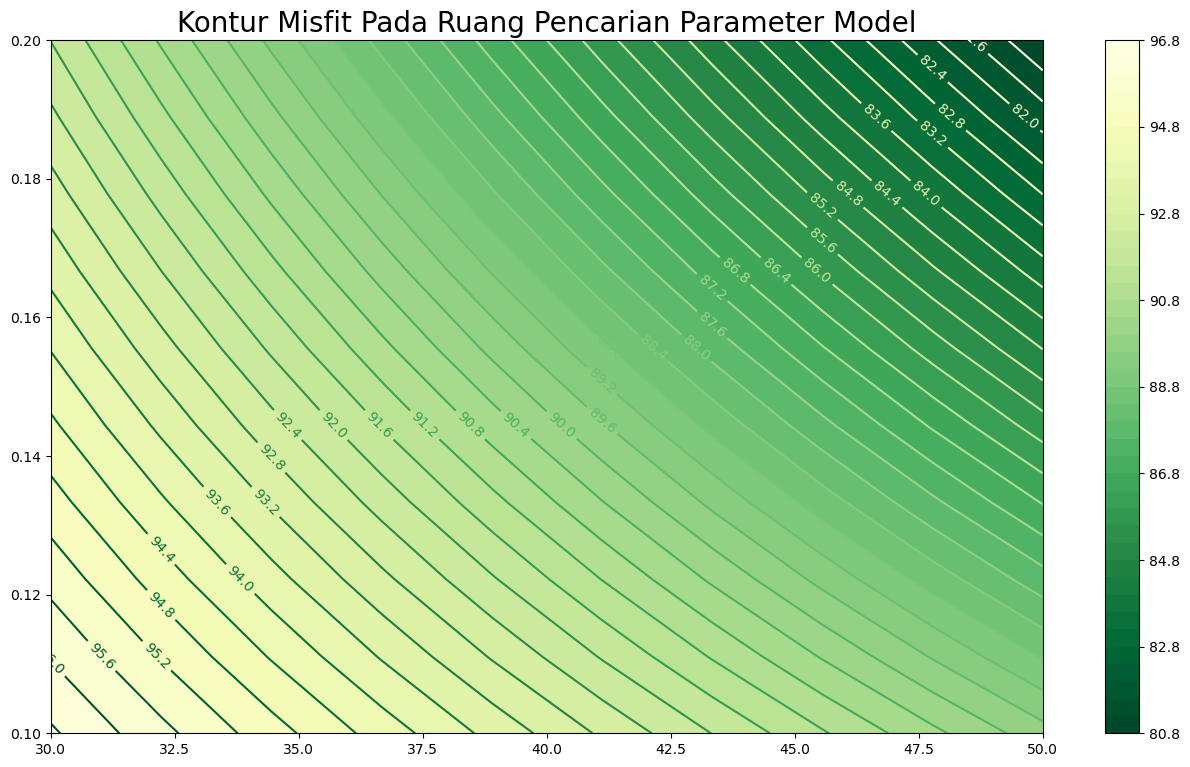

In [3]:
plt.figure(figsize=(16,9))
plt.title('Kontur Misfit Pada Ruang Pencarian Parameter Model', fontsize=20)
cs1=plt.contourf(xsolver, m, Terr1,50,cmap=plt.cm.YlGn_r)
plt.colorbar()
cs2=plt.contour(xsolver, m, Terr1,50,cmap=plt.cm.YlGn)
plt.clabel(cs2, fontsize=10)
plt.show()

